In [55]:
from fastsim import vehicle, cycle, simdrive
import matplotlib.pyplot as plt
veh = vehicle.Vehicle(18)
cyc1 = cycle.Cycle("udds")

In [56]:
sim1 = simdrive.SimDriveClassic(cyc1, veh)
sim1.sim_drive()
r=zip(cyc1.cycSecs,sim1.soc*100)

2016 CHEVROLET Spark EV


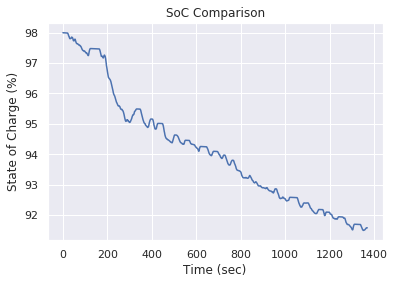

In [57]:
plt.plot(cyc1.cycSecs,sim1.soc*100,label='UDDS')
plt.ylabel("State of Charge (%)")
plt.xlabel('Time (sec)')
plt.title('SoC Comparison')
print(veh.Scenario_name)

In [58]:
# import csv
# with open('SoCUDDSData.csv','w',newline='') as csvfile:
#     writer = csv.writer(csvfile, delimiter = ' ', quotechar='|',quoting=csv.QUOTE_MINIMAL)
#     for row in r:
#         writer.writerow(row)

In [59]:
import numpy as np
from matplotlib import pyplot as plt
m=1700
g=9.81
#maxgenspeed=10000 #rpm
#maxtractspeed=13500 #rpm
cd=0.288
p=1.225
A=2.799
crr=0.0125
#finaldriveratio=3.543
#ringgearteeth=78
#sungearteeth=30
rwheel=0.33
deltak=1
#battery
rint=0.373
Qbatt=35*3600 #LOOK AT THIS ONE BOIIIII. This makes it close but the
# Kona's Qbatt is 189.6 like below
#Qbatt=189.6*3600 #A*s
Voc=356
ftp = np.loadtxt('v vs time udds.txt', dtype=float)
time_s = ftp[:,0]
finaldrive=7.981
#convert mph to mps by multiplying by 0.447
vk = ftp[:,1]*0.447 #kph
Fpropks=[]
index=0
#Propulsion force calculations for each timestep
for index, elem in enumerate(vk):
    if (index+1 < len(vk) and index - 1 >= 0): #Check index bounds
        vkboop = float(elem)
        vk1 = float(vk[index+1])
        Fpropk=0.5*cd*p*A*vkboop+crr*m*g+m*(vk1-vkboop)/deltak
        Fpropks.append(Fpropk)
 
#Angular velocity for each timestep
#warray=[]
warray=vk*finaldrive/rwheel

print(warray)
print(max(warray))
#Torque for each timestep
Tarray=[]
wbase=377 #rad/s
Xm=0.75
Tmstar=395 #Nm
wmax=450 #rad/s
constantmotorpower=150000 #W

def piecewise (warray):
    if 0 <= warray <= wbase:
        return Xm*Tmstar
    elif warray >= wbase and warray <= wmax:
        return Xm*constantmotorpower/warray
for i in range(len(warray)):
    Tarray.append(piecewise(warray[i]))

[0. 0. 0. ... 0. 0. 0.]
612.9625663847819


In [60]:
#calculation of efficiency at each timestep
import pandas as pd
df = pd.read_csv('MotorEfficiencyData.csv')
eff_1 = np.interp(warray,df['SPEED [rad/s]'],df['EFFY [%]'])

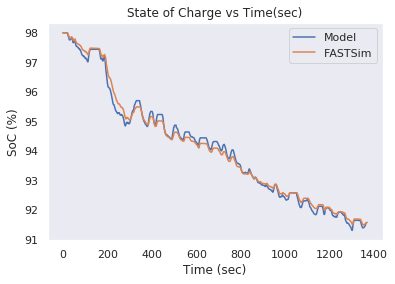

In [61]:
Pmotor = Fpropks*vk[1:-1]
Pbattk = Pmotor/(0.01 * eff_1[1:-1])
sock1=97.999 #%
sock11 = 97.999
socks1 = []
socks=[]
Pbattk1= Pmotor/0.8
for index, elem in enumerate(Pbattk):
    if (index+1 < len(Pbattk) and index - 1 >= 0): #Check index bounds
        Pbattks=float(elem)
        socks.append(sock1)
        sock1 = sock1-100*((Voc-(Voc**(2)-4*Pbattks*rint)**(0.5))*deltak/(2*rint*Qbatt))
for index, elem in enumerate(Pbattk1):
    if (index+1 < len(Pbattk1)and index - 1 >= 0): #Check index bounds
        Pbattks1=float(elem)
        socks1.append(sock11)
        sock11=sock11-100*((Voc-(Voc**(2)-4*Pbattks1*rint)**(0.5))*deltak/(2*rint*Qbatt))
time=time_s[:-4]
plt.plot(time,socks, label = "Model")
plt.plot(cyc1.cycSecs,sim1.soc*100,label='FASTSim')

plt.title('State of Charge vs Time(sec)')
plt.xlabel("Time (sec)")
plt.ylabel("SoC (%)")
plt.legend()
plt.show()
